In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import folium
from folium.plugins import HeatMap, HeatMapWithTime

In [2]:
df = pd.read_csv('cincinnati_traffic_crash_data__cpd.csv')

In [3]:
df.head()

,Unnamed: 0,ADDRESS_X,LATITUDE_X,LONGITUDE_X,AGE,COMMUNITY_COUNCIL_NEIGHBORHOOD,CPD_NEIGHBORHOOD,CRASHDATE,CRASHLOCATION,CRASHSEVERITY,...,LOCALREPORTNO,MANNEROFCRASH,ROADCONDITIONSPRIMARY,ROADCONTOUR,ROADSURFACE,SNA_NEIGHBORHOOD,TYPEOFPERSON,WEATHER,ZIP,UNITTYPE
0,19,63XX GRACELY,39.107808,-84.688195,31-40,SAYLER PARK,SAYLER PARK,06/17/2014 05:25:00 PM,03 - T-INTERSECTION,3 - PROPERTY DAMAGE ONLY (PDO),...,145004877,2 - REAR-END,01 - DRY,1 - STRAIGHT LEVEL,"2 - BLACKTOP, BITUMINOUS, ASPHALT",SAYLER PARK,D - DRIVER,1 - CLEAR,45233,03 - MID SIZE
1,20,9XX CHATEAU AV,39.108110,-84.560280,18-25,EAST PRICE HILL,EAST PRICE HILL,02/15/2015 03:00:00 PM,01 - NOT AN INTERSECTION,2 - INJURY,...,155002081,1 - NOT COLLISION BETWEEN TWO MOTOR VEHICLES I...,01 - DRY,2 - STRAIGHT GRADE,"2 - BLACKTOP, BITUMINOUS, ASPHALT",EAST PRICE HILL,O - OCCUPANT,1 - CLEAR,45204,02 - COMPACT
2,21,30XX READING RD,39.135486,-84.496520,18-25,AVONDALE,AVONDALE,07/23/2015 11:54:00 PM,01 - NOT AN INTERSECTION,3 - PROPERTY DAMAGE ONLY (PDO),...,155010090,"7 - SIDESWIPE, SAME DIRECTION",01 - DRY,1 - STRAIGHT LEVEL,"2 - BLACKTOP, BITUMINOUS, ASPHALT",AVONDALE,O - OCCUPANT,1 - CLEAR,45206,04 - FULL SIZE
3,22,36XX READING RD,39.147889,-84.489222,61-70,AVONDALE,AVONDALE,04/21/2018 01:00:00 PM,01 - NOT AN INTERSECTION,3 - PROPERTY DAMAGE ONLY (PDO),...,185005525,"7 - SIDESWIPE, SAME DIRECTION",01 - DRY,1 - STRAIGHT LEVEL,"2 - BLACKTOP, BITUMINOUS, ASPHALT",AVONDALE,D - DRIVER,1 - CLEAR,45229,07 - PICKUP
4,23,37XX WARSAW AV,39.110989,-84.573138,31-40,EAST PRICE HILL,EAST PRICE HILL,09/01/2018 07:59:00 PM,03 - T-INTERSECTION,3 - PROPERTY DAMAGE ONLY (PDO),...,185012267,6 - ANGLE,01 - DRY,1 - STRAIGHT LEVEL,"2 - BLACKTOP, BITUMINOUS, ASPHALT",EAST PRICE HILL,D - DRIVER,1 - CLEAR,45205,04 - FULL SIZE


In [3]:
df.shape

(258672, 27)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258672 entries, 0 to 258671
Data columns (total 27 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unnamed: 0                      258672 non-null  int64  
 1   ADDRESS_X                       258669 non-null  object 
 2   LATITUDE_X                      258672 non-null  float64
 3   LONGITUDE_X                     258672 non-null  float64
 4   AGE                             258672 non-null  object 
 5   COMMUNITY_COUNCIL_NEIGHBORHOOD  253006 non-null  object 
 6   CPD_NEIGHBORHOOD                252959 non-null  object 
 7   CRASHDATE                       258669 non-null  object 
 8   CRASHLOCATION                   194021 non-null  object 
 9   CRASHSEVERITY                   258672 non-null  object 
 10  CRASHSEVERITYID                 258672 non-null  float64
 11  DATECRASHREPORTED               258670 non-null  object 
 12  DAYOFWEEK       

In [5]:
df.isnull().sum()

Unnamed: 0                            0
ADDRESS_X                             3
LATITUDE_X                            0
LONGITUDE_X                           0
AGE                                   0
COMMUNITY_COUNCIL_NEIGHBORHOOD     5666
CPD_NEIGHBORHOOD                   5713
CRASHDATE                             3
CRASHLOCATION                     64651
CRASHSEVERITY                         0
CRASHSEVERITYID                       0
DATECRASHREPORTED                     2
DAYOFWEEK                             1
GENDER                            28989
INJURIES                            222
INSTANCEID                            0
LIGHTCONDITIONSPRIMARY                2
LOCALREPORTNO                         0
MANNEROFCRASH                         1
ROADCONDITIONSPRIMARY                 2
ROADCONTOUR                           2
ROADSURFACE                           2
SNA_NEIGHBORHOOD                   5737
TYPEOFPERSON                        222
WEATHER                               2


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,258672.0,1.293545e+05,7.467232e+04,1.900000e+01,6.468675e+04,1.293545e+05,1.940222e+05,2.586900e+05
LATITUDE_X,258672.0,3.333947e+03,1.656398e+06,-8.448932e+01,3.911692e+01,3.913638e+01,3.916082e+01,8.424329e+08
LONGITUDE_X,258672.0,-1.520631e+04,7.684952e+06,-3.908552e+09,-8.454885e+01,-8.451477e+01,-8.448477e+01,1.000000e-03
CRASHSEVERITYID,258672.0,5.054298e+04,8.746358e+04,1.000000e+00,3.000000e+00,3.000000e+00,2.019010e+05,2.019050e+05
LOCALREPORTNO,258672.0,1.713458e+08,2.233038e+07,1.400000e+01,1.550072e+08,1.750033e+08,1.850186e+08,1.350001e+09


## This is second commit.

## Data Cleaning

In [7]:
# fix CRASHSEVERITYID
df['CRASHSEVERITYID'][:20]

0          3.0
1          2.0
2          3.0
3          3.0
4          3.0
5          1.0
6          3.0
7          2.0
8     201905.0
9          3.0
10         3.0
11         3.0
12         3.0
13         3.0
14    201905.0
15         3.0
16         3.0
17    201905.0
18         3.0
19    201904.0
Name: CRASHSEVERITYID, dtype: float64

In [9]:
df['CRASHSEVERITY'][:20]

0     3 - PROPERTY DAMAGE ONLY (PDO)
1                         2 - INJURY
2     3 - PROPERTY DAMAGE ONLY (PDO)
3     3 - PROPERTY DAMAGE ONLY (PDO)
4     3 - PROPERTY DAMAGE ONLY (PDO)
5                   1 - FATAL INJURY
6     3 - PROPERTY DAMAGE ONLY (PDO)
7                         2 - INJURY
8           5 - PROPERTY DAMAGE ONLY
9     3 - PROPERTY DAMAGE ONLY (PDO)
10    3 - PROPERTY DAMAGE ONLY (PDO)
11    3 - PROPERTY DAMAGE ONLY (PDO)
12    3 - PROPERTY DAMAGE ONLY (PDO)
13    3 - PROPERTY DAMAGE ONLY (PDO)
14          5 - PROPERTY DAMAGE ONLY
15    3 - PROPERTY DAMAGE ONLY (PDO)
16    3 - PROPERTY DAMAGE ONLY (PDO)
17          5 - PROPERTY DAMAGE ONLY
18    3 - PROPERTY DAMAGE ONLY (PDO)
19               4 - INJURY POSSIBLE
Name: CRASHSEVERITY, dtype: object

In [10]:
def CrashSeverityIDFixed(x):
    
    if x == 201905.0:
        
        return 5
    
    elif x == 201904.0:
        
        return 4
    
    elif x == 201903.0:
        
        return 3
    
    elif x == 201902.0:
        
        return 2
    
    else:
        
        return x
    
df['CRASHSEVERITYID'] = df['CRASHSEVERITYID'].apply(lambda x: CrashSeverityIDFixed(x))
       


In [11]:
# Fix Gender

df['GENDER'][:20]

0     F - FEMALE
1     F - FEMALE
2     F - FEMALE
3       M - MALE
4       M - MALE
5       M - MALE
6            NaN
7       M - MALE
8     F - FEMALE
9       M - MALE
10      M - MALE
11      M - MALE
12    F - FEMALE
13      M - MALE
14    F - FEMALE
15      M - MALE
16    F - FEMALE
17      M - MALE
18      M - MALE
19    F - FEMALE
Name: GENDER, dtype: object

In [12]:
df.loc[(df['GENDER'] == 'MALE'), 'GENDER'] = 'M - MALE'
df.loc[(df['GENDER'] == 'FEMALE'), 'GENDER'] = 'F - FEMALE'

In [13]:
# Fix CRASHDIVERSITY
df.loc[(df['CRASHSEVERITY'] == '1 - FATAL'), 'CRASHDIVERSITY'] = '1 - FATAL INJURY'
df.loc[(df['CRASHSEVERITY'] == '3 - PROPERTY DAMAGE ONLY (PDO)'), 'CRASHDIVERSITY'] = '5 - PROPERTY DAMAGE ONLY'


In [14]:
# CREATE A SIMPLE LOOP TO FIX THE OTHER 6 COLUMNS
cols = ['INJURIES', 'LIGHTCONDITIONSPRIMARY', 'ROADCONDITIONSPRIMARY', 'ROADSURFACE', 'WEATHER', 'CRASHSEVERITY']

for col in cols:
    
    df[col] = df[col].str.split(" - ", 1).str[1]

In [15]:
# Adjust some column types
df = df.astype({"CRASHSEVERITYID": object, "LOCALREPORTNO": object})

## Feature Engineering

In [17]:
df.CRASHDATE[:10]

0    06/17/2014 05:25:00 PM
1    02/15/2015 03:00:00 PM
2    07/23/2015 11:54:00 PM
3    04/21/2018 01:00:00 PM
4    09/01/2018 07:59:00 PM
5    08/30/2015 09:51:00 PM
6    11/07/2014 09:30:00 PM
7    12/08/2015 01:33:00 PM
8    01/24/2020 02:40:00 PM
9    06/12/2013 04:08:00 PM
Name: CRASHDATE, dtype: object

In [19]:
# Data Adjustment
df['CRASHDATE'] = pd.to_datetime(df['CRASHDATE'])
df['CRASH_SHORTDATE'] = df['CRASHDATE'].dt.strftime('%Y/%m')
df['CRASH_YEAR'] = pd.DatetimeIndex(df['CRASHDATE']).year
df['CRASH_MONTH'] = pd.DatetimeIndex(df['CRASHDATE']).month
df['CRASH_DAY'] = pd.DatetimeIndex(df['CRASHDATE']).day
df['CRASH_DAYOFWEEK'] = pd.DatetimeIndex(df['CRASHDATE']).day_name()
df['CRASH_ISWKND'] = df['CRASH_DAYOFWEEK'].apply(lambda x: 1 if x in [5,6] else 0)

# Time Adjustments
df['CRASH_HOUR'] = pd.DatetimeIndex(df['CRASHDATE']).hour

def TimeofDay(x):
    
    if 4 <= x <= 7:
        
        return 'Early Morning'
    
    elif 8 <= x <= 11:
        
        return 'Morning'
    
    elif 12 <= x <= 15:
        
        return 'Noon'
    
    elif 16 <= x <= 19:
        
        return 'Evening'
    
    elif 20 <= x <= 23:
        
        return 'Night'
    
    else:
        
        return 'Midnight'
    
    
df['CRASH_TIMEOFDAY'] = df['CRASH_HOUR'].apply(lambda x: TimeofDay(x))


## Exploratory Data Analysis

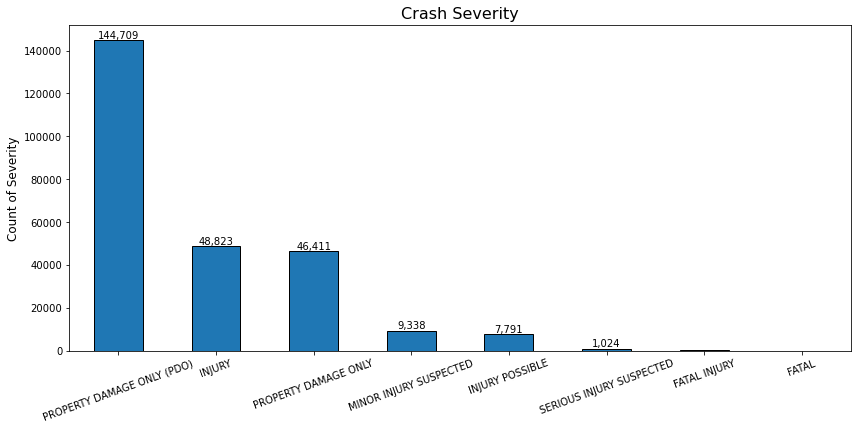

In [33]:
# Crash Severity
df_severity = df["CRASHSEVERITY"].value_counts()

# Define the plots
fig, ax = plt.subplots(figsize = (14,6))
df_severity.plot(kind='bar',
        align='center', width=.5, edgecolor='black', ax=ax)

# Format Labels
plt.xticks(rotation=20)
plt.title("Crash Severity", fontdict = {'size':16})
plt.ylabel("Count of Severity", fontdict = {'size':12})
plt.xlabel("")
for i in range(6):
    plt.text(x = i, y = round(df_severity[i],2), s = '{:,}'.format(df_severity[i]), horizontalalignment = 'center', verticalalignment = 'bottom')
plt.show()

#### Types of Cars involved in Crashes

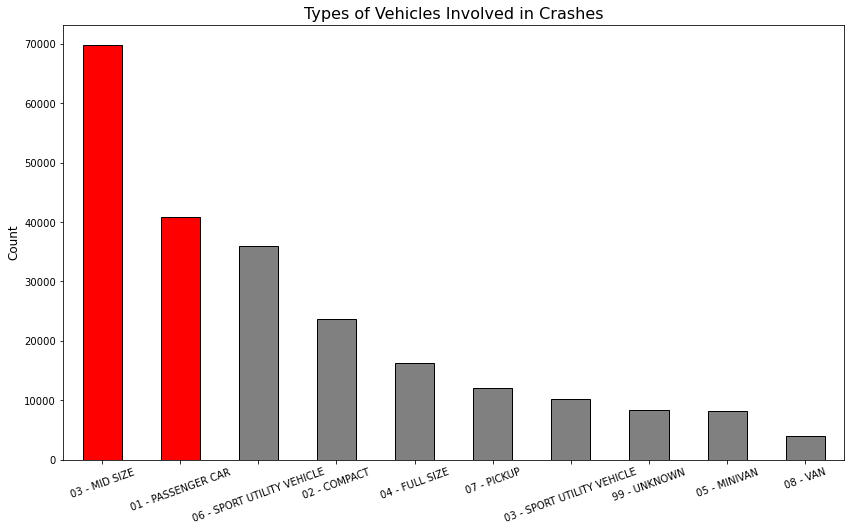

In [34]:
# Crash Severity

df_unit = df['UNITTYPE'].value_counts()[:10]


# Define the plots

fig, ax = plt.subplots(figsize = (14, 8))
df_unit.plot(kind='bar', align = 'center', width = .5, edgecolor = 'black',
            color = list('r'*2) + list(['gray'] * 8), ax = ax)

# Format Labels

plt.xticks(rotation=20)
plt.title("Types of Vehicles Involved in Crashes", fontdict = {'size':16})
plt.ylabel("Count", fontdict = {'size':12})
plt.xlabel("")

plt.show()

#### Viewing Crash Severity by different age groups

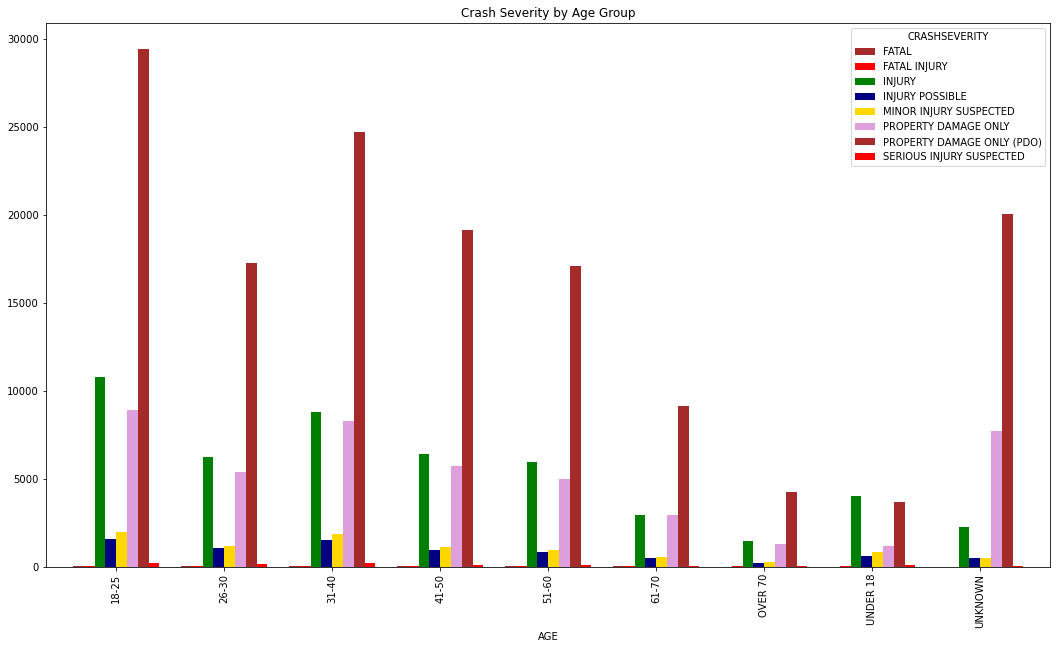

In [41]:
df_age_crash = df.groupby('AGE')["CRASHSEVERITY"].value_counts().unstack()

df_age_crash.plot(
    kind="bar",
    figsize = (18,10),
    color=["brown", "red", "green", "navy", 'gold','plum'],
    width=.80,
    title='Crash Severity by Age Group',
    #ylabel='Count of Severity',
    #xlabel=''
)

In [42]:
df_age_crash

CRASHSEVERITY,FATAL,FATAL INJURY,INJURY,INJURY POSSIBLE,MINOR INJURY SUSPECTED,PROPERTY DAMAGE ONLY,PROPERTY DAMAGE ONLY (PDO),SERIOUS INJURY SUSPECTED
AGE,,,,,,,,
18-25,44,65,10781,1573,2004,8881,29409,215
26-30,20,65,6258,1046,1197,5379,17259,137
31-40,29,57,8766,1513,1883,8296,24690,210
41-50,22,57,6406,935,1133,5724,19121,130
51-60,25,40,5934,832,938,4985,17098,88
61-70,19,31,2954,521,540,2951,9152,62
OVER 70,13,23,1454,233,255,1316,4264,32
UNDER 18,9,39,4012,617,860,1181,3678,98
UNKNOWN,6,12,2258,521,528,7698,20038,52


#### Day of Week

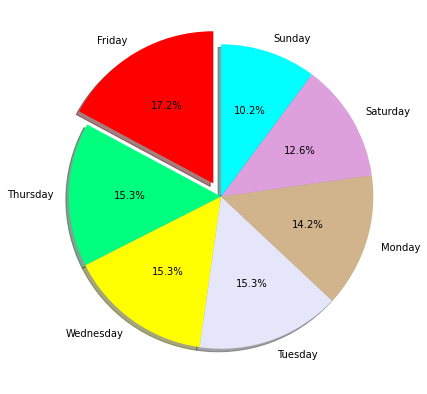

In [43]:
df_pie = df['CRASH_DAYOFWEEK'].value_counts(normalize = True).reset_index()

df_pie['CRASH_DAYOFWEEK'] = 100*df_pie['CRASH_DAYOFWEEK']

plt.figure(figsize = (7,7))

plt.pie(
    x = df_pie['CRASH_DAYOFWEEK'],
    colors=["red", "springgreen", "yellow", "lavender", 'tan','plum', 'cyan'],
    labels = df_pie['index'],
    explode = [0.1,0,0,0,0,0,0],
    shadow = True,
    autopct = '%1.1f%%',
    startangle = 90   
)
plt.show()

#### Day of the Month and Crashes

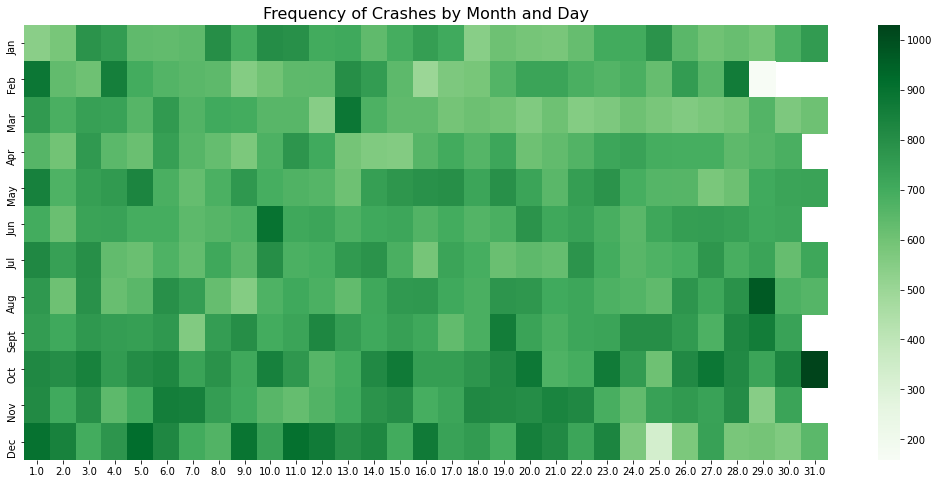

In [45]:
piv = pd.pivot_table(columns = df['CRASH_DAY'], values = 'CRASH_DAY', index = 'CRASH_MONTH', aggfunc = 'count', data = df)

plt.figure(figsize = (18, 8))
sns.heatmap(piv, cmap = 'Greens')

plt.yticks(np.arange(0.5, 12.5) , ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sept','Oct','Nov','Dec'])
plt.xlabel('')
plt.ylabel('')
plt.title("Frequency of Crashes by Month and Day", fontdict = {'size': 16})

plt.show()



#### Time and Day of Crashes

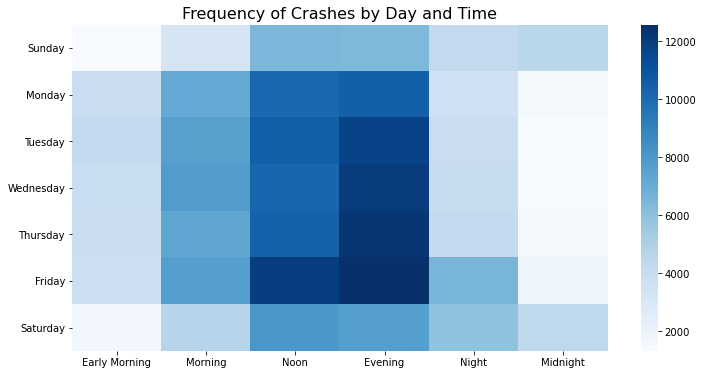

In [46]:
piv = pd.pivot_table(columns= df['CRASH_TIMEOFDAY'], values = 'CRASH_TIMEOFDAY', index = 'CRASH_DAYOFWEEK', aggfunc = 'count', data = df)

# redo the index
piv = piv.reindex(
    index = ['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'],
    columns = ['Early Morning','Morning','Noon','Evening','Night','Midnight'])

plt.figure(figsize = (12, 6))
sns.heatmap(piv, cmap = 'Blues')

plt.xlabel('')
plt.ylabel('')
plt.title("Frequency of Crashes by Day and Time", fontdict = {'size' : 16})
plt.show()

## Visualization on Maps

In [76]:
# create the initial map
cincy  = folium.Map(location = [39.117072, -84.520164],control_scale=True, zoom_start=14)

# Triple checking that the colum is float
df['LATITUDE_X'] = df['LATITUDE_X'].astype(float)
df['LONGITUDE_X'] = df['LONGITUDE_X'].astype(float)


# Filter down the data so that we only look at fatal crashes in 2020
heat_df = df[df['CRASH_YEAR']==2020]
heat_df = df[df['CRASHSEVERITY'] == 'FATAL INJURY']
heat_df = heat_df[['LATITUDE_X', 'LONGITUDE_X']]
heat_df = heat_df.dropna(axis=0, subset=['LATITUDE_X','LONGITUDE_X'])

# Create a list of lists with list comprehension
heat_data = [[row['LATITUDE_X'],row['LONGITUDE_X']] for index, row in heat_df.iterrows()]

# Create a Title
title_html = '''<h3 align="center" style="font-size:18px"><b>Cincinnati Fatal Crashes 2020</b></h3>'''
cincy.get_root().html.add_child(folium.Element(title_html))

'''
# Add some markers
for marker in markers:
    
    folium.Marker([marker['lat'], marker['lon']],
                  popup = marker['desc'],
                  tooltip = marker['tip'],
                  icon=folium.Icon(color='red'),
                  min_width=300
                 ).add_to(cincy)

# Plot it on the map
HeatMap(heat_data).add_to(cincy)

# Display the map
cincy
'''

"\n# Add some markers\nfor marker in markers:\n    \n    folium.Marker([marker['lat'], marker['lon']],\n                  popup = marker['desc'],\n                  tooltip = marker['tip'],\n                  icon=folium.Icon(color='red'),\n                  min_width=300\n                 ).add_to(cincy)\n\n# Plot it on the map\nHeatMap(heat_data).add_to(cincy)\n\n# Display the map\ncincy\n"

In [68]:
cincy